In [3]:
import pandas as pd

ModuleNotFoundError: No module named 'pandas'

In [2]:
df = pd.read_csv('ptbdb_normal.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'ptbdb_normal.csv'

Get row 1 and convert it to a string

In [ ]:
row_1

In [ ]:
row_1 =  df.loc[20]
# Get a specific row as a string
row_string = row_1.to_string(index=False)
row_string

Convert row 1 to a list

In [ ]:
row_1_list = row_1.values.tolist()
row_1_list

In [ ]:
row_str = str(row_1_list)
row_str

In [ ]:
row_1_list_x = eval(row_str)
row_1_list_x

Convert the list back to series

In [ ]:
# Create a new Series object from the row string
row_series = pd.Series(row_1_list)
row_series

In [ ]:
# Create a new Series object from the row string
row_series = pd.Series(row_string.split())
row_series

## ECG signal to beats before POSTing into database

In [1]:
from data_process.dataProcessor import signal_to_beats
import numpy as np
import json
import pandas as pd

In [2]:
pip install wfdb

  Obtaining dependency information for wfdb from https://files.pythonhosted.org/packages/ce/00/b83d0bd64384455dbc1f8eccb7b5d6dac23728515a9d4d74aa4def6c6fe4/wfdb-4.1.2-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 3.4 MB/s eta 0:00:0000:0100:010m
  Obtaining dependency information for requests>=2.8.1 from https://files.pythonhosted.org/packages/70/8e/0e2d847013cb52cd35b38c009bb167a1a26b2ce6cd6965bf26b47bc0bf44/requests-2.31.0-py3-none-any.whl.metadata
  Obtaining dependency information for charset-normalizer<4,>=2 from https://files.pythonhosted.org/packages/bc/85/ef25d4ba14c7653c3020a1c6e1a7413e6791ef36a0ac177efa605fc2c737/charset_normalizer-3.2.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 8.8 MB/s eta 0:00:00
  Obtaining dependency information for urllib3<3,>=1.21.1 from https://files.pythonhosted.org/packages/8a/03/ad9306a50d05c166e3456fe810f33cee2b8b2a7a6818ec5d49

Read complete ECG signal

<Axes: >

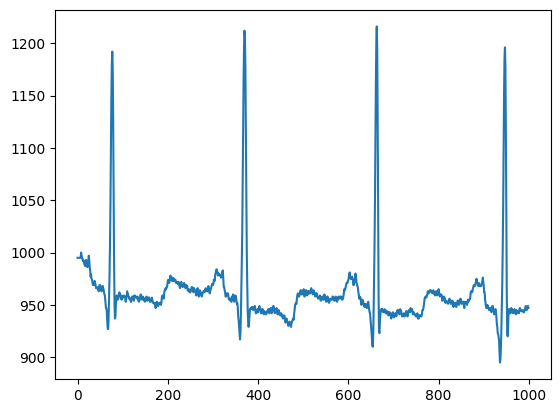

In [5]:
df = pd.read_csv('archive/100.csv')
signal = df['\'MLII\''][0:1000]

# plot a portion 
signal.plot.line()

Process and segment beats from the signal

188

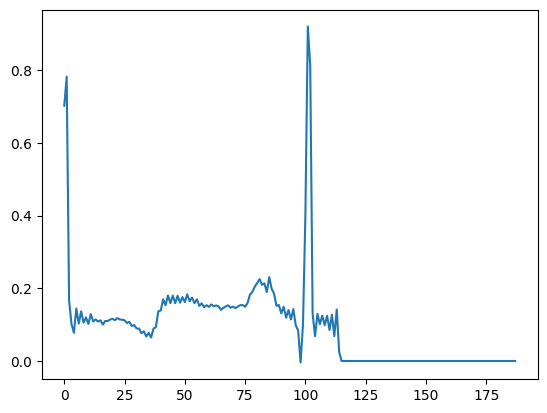

In [8]:
import matplotlib.pyplot as plt

beats = signal_to_beats(signal)
plt.plot(beats[2])
len(beats[2])

Convert beats list to string

In [9]:
# Convert each numpy array in beats into a list
beats_list = [beat.tolist() for beat in beats]

# Convert beats_list into a JSON string
beats_json = json.dumps(beats_list)
beats_json

'[[0.21057274036850043, 0.2665934965657692, 0.25251444555882135, 0.26855470941235127, 0.24946238039896818, 0.24092366863562936, 0.23165073601343306, 0.2381557144861942, 0.2302715650193555, 0.2553555961379326, 0.1966064222704907, 0.1855752924355085, 0.15526427722245387, 0.17059387064768558, 0.15576074874529297, 0.1491363738714904, 0.1424432095987671, 0.15334252911588214, 0.15247704819962227, 0.142205113494609, 0.14789994755046607, 0.1205427951470695, 0.08907680228249573, 0.03335924531307588, 0.01966953963387053, 0.23851670430900598, 0.6755656571152115, 1.0138530693336125, 0.5171043988370045, 0.038312149283079674, 0.10758168395132624, 0.10987490705551349, 0.12561106697034677, 0.12228863280589349, 0.11123633339130601, 0.11420402235798052, 0.11844043140263327, 0.11057465116026012, 0.11134118495294987, 0.13535224843441543, 0.09874642731424141, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

Convert beats string to list

In [10]:
def beats_str_to_list(beats_json):
    
    # Convert beats_json string back into a list of lists
    beats_list = json.loads(beats_json)

    # Convert each inner list in beats_list into a numpy array
    new_beats = [np.array(beat) for beat in beats_list]

    return new_beats

In [11]:
# convert beats json to list
beats = beats_str_to_list(beats_json)

In [20]:
beats = beats_str_to_list(beats_json)
type(beats_json)

str

In [12]:
annotation = 1

if annotation == 0:
    path = "E:/Work/TnR Lab/FED-MAIN/Federated-ECG/ECG Classification/datasets/ptbdb_normal.csv"
else:
    path = "E:/Work/TnR Lab/FED-MAIN/Federated-ECG/ECG Classification/datasets/ptbdb_abnormal.csv"

In [13]:
# Create a DataFrame from the list of NumPy arrays
# remove the first and the last beat as they tend to remain incomplete
new_beats = pd.DataFrame(beats[1: (len(beats)-1)])
new_beats.head(3)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.669411,0.579191,0.027081,0.159776,0.109931,0.165558,0.127484,0.147963,0.123659,0.152570,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.702475,0.782524,0.166335,0.101707,0.077532,0.144347,0.102707,0.136863,0.105399,0.120042,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Load the existing CSV file
existing_dataset = pd.read_csv(path, header=None)
existing_dataset.head(3)

FileNotFoundError: [Errno 2] No such file or directory: 'E:/Work/TnR Lab/FED-MAIN/Federated-ECG/ECG Classification/datasets/ptbdb_abnormal.csv'

In [34]:
# Add the DataFrame to the existing DataFrame
new_df = pd.concat([existing_dataset, new_beats], axis=0)

# Write the new DataFrame to the CSV file
new_df.to_csv(path, index=False)
new_df


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,...,178.0,179.0,180.0,181.0,182.0,183.0,184.0,185.0,186.0,187.0
1,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,...,178.0,179.0,180.0,181.0,182.0,183.0,184.0,185.0,186.0,187.0
2,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,0.729367,0.654034,0.038521,0.165008,0.111128,0.155602,0.111003,0.139920,0.121053,0.142478,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,0.730387,0.630206,0.014310,0.155562,0.109583,0.155464,0.115933,0.147435,0.117730,0.141526,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,0.684395,0.661460,0.022902,0.104339,0.067226,0.126241,0.088650,0.133480,0.092155,0.119515,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,0.633719,0.664024,0.037191,0.044069,0.041188,0.086448,0.061648,0.085658,0.063425,0.080692,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
plt.plot(beats[10])

Convert beats_json string back into a list

In [ ]:
# Convert beats_json string back into a list of lists
beats_list = json.loads(beats_json)

# Convert each inner list in beats_list into a numpy array
new_beats = [np.array(beat) for beat in beats_list]
new_beats

In [ ]:
beat0 = beats[0]

# convert ndarray to string
beat0_str = beats[0].tobytes()

# convert back to ndarray
new_arr = np.frombuffer(beat0_str, dtype=beat0.dtype)

In [ ]:
x = [1.0, 0.19274567067623136, 0.02319696359336376, 0.047237452119588845, 0.027414593845605847, 0.09447490423917769, 0.11514128744602203, 0.1189371570944786, 0.12695065140724182, 0.12905946373939514, 0.12737241387367249, 0.12990298867225647, 0.13159005343914032, 0.13580767810344696, 0.1396035403013229, 0.14044706523418427, 0.14424294233322144, 0.14550822973251343, 0.1564740687608719, 0.1573175936937332, 0.16533108055591583, 0.1598481684923172, 0.17081400752067563, 0.17714044451713562, 0.18810628354549408, 0.19443273544311523, 0.1990721225738525, 0.21425558626651764, 0.2218473255634308, 0.23407845199108124, 0.2370307892560959, 0.248418390750885, 0.2555883526802063, 0.25980597734451294, 0.2568536400794983, 0.24673134088516235, 0.2399831265211105, 0.2226908504962921, 0.20919443666934967, 0.20160269737243647, 0.18515394628047943, 0.17250105738639832, 0.15900464355945587, 0.15099114179611206, 0.14466470479965207, 0.14382117986679077, 0.13707296550273895, 0.13369886577129364, 0.13116827607154846, 0.13201181590557098, 0.1294812262058258, 0.1235765516757965, 0.13243357837200165, 0.13454239070415497, 0.1412905901670456, 0.14466470479965207, 0.1480388045310974, 0.15436524152755737, 0.1564740687608719, 0.15563052892684937, 0.1573175936937332, 0.16026993095874786, 0.16195698082447052, 0.15689583122730255, 0.1594264060258865, 0.15478700399398804, 0.15267819166183472, 0.14888232946395874, 0.1459299921989441, 0.14382117986679077, 0.14213411509990692, 0.14086882770061493, 0.1307465136051178, 0.1235765516757965, 0.13496415317058563, 0.12905946373939514, 0.12779417634010315, 0.1294812262058258, 0.12442007660865784, 0.12695065140724182, 0.12568536400794983, 0.12399831414222716, 0.12399831414222716, 0.13159005343914032, 0.14297764003276825, 0.16237874329090118, 0.19654154777526853, 0.2020244598388672, 0.18852804601192477, 0.18557570874691007, 0.2172079235315323, 0.20835091173648837, 0.19021509587764737, 0.18852804601192477, 0.18009278178215027, 0.1396035403013229, 0.11261071264743804, 0.10417545586824416, 0.10248839855194092, 0.09489666670560835, 0.08814845979213713, 0.08772669732570648, 0.08814845979213713, 0.08393082767724992, 0.08646140992641449, 0.09194432944059375, 0.0873049348592758, 0.08393082767724992, 0.05820329114794731, 0.11261071264743804, 0.2167861610651016, 0.5563053488731384, 0.9152256250381469, 0.8966680765151978, 0.09574019163846968, 0.0, 0.029945170506834984, 0.019401095807552338, 0.0759173333644867, 0.09320961683988573, 0.10417545586824416, 0.10417545586824416, 0.10459721833467484, 0.1037536934018135, 0.10923660546541213, 0.11303247511386871, 0.1109236627817154, 0.1142977625131607, 0.12104596942663191, 0.1235765516757965, 0.1282159388065338, 0.12695065140724182, 0.1307465136051178, 0.13496415317058563, 0.14719527959823608, 0.1518346667289734, 0.16026993095874786, 0.16490931808948517, 0.17503163218498227, 0.19021509587764737, 0.19865036010742188, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

print(len(x))